# Project Review: Predicting Customer Bookings

This notebook provides a review of the customer booking prediction project. The goal is to understand the data  and explore key features. The findings and insights gained through this analysis will guide strategic business decisions for improving customer retention and conversion.

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Overview](#Data-Overview)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)


## Data Overview
The dataset contains information about customer bookings, including features like the number of passengers, flight duration, and booking origin. The target variable, `booking_complete`, indicates whether the booking was completed or not.

**Columns Description**:
- `num_passengers`: Number of passengers traveling.
- `purchase_lead`: Days between booking and travel date.
- `flight_duration`: Duration of the flight in hours.
- `booking_complete`: Indicator of booking completion (0 or 1).

## Exploratory Data Analysis
In this section, we perform EDA to understand the distribution of features and identify any patterns or relationships that may influence booking completion.
- Visualizations are used to explore key trends and correlations.

In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [4]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [5]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [6]:
# Check data types and unique values for each column
print(df.dtypes)

# Summarize unique values for categorical features to understand their distribution
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")


num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object
Unique values in 'sales_channel': ['Internet' 'Mobile']
Unique values in 'trip_type': ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values in 'route': ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' '

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder to 'booking_origin'
booking_origin_encoded = pd.get_dummies(df['booking_origin'], prefix='origin')

# Drop original 'booking_origin' and concatenate the encoded DataFrame
df = pd.concat([df.drop(columns=['booking_origin']), booking_origin_encoded], axis=1)

# Verify the changes
print(df.head())


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour  flight_day   route  wants_extra_baggage  wants_preferred_seat  \
0            7           6  AKLDEL                    1                     0   
1            3           6  AKLDEL                    0                     0   
2           17           3  AKLDEL                    1                     1   
3            4           6  AKLDEL                    0                     0   
4           15           3  AKLDEL                    1                     0   

   ...  origin_Timor-Leste  origin_Tonga  origin_T

In [8]:
# Split the 'route' into 'origin' (first three characters) and 'destination' (remaining characters)
df[['origin', 'destination']] = df['route'].str.extract(r'(\w{3})(\w{3})')

# Drop the original 'route' column
df = df.drop(columns=['route'])

# Verify the changes
print(df[['origin', 'destination']].head())


  origin destination
0    AKL         DEL
1    AKL         DEL
2    AKL         DEL
3    AKL         DEL
4    AKL         DEL


In [9]:
# Apply OneHotEncoder to 'origin' and 'destination'
origin_encoded = pd.get_dummies(df['origin'], prefix='origin')
destination_encoded = pd.get_dummies(df['destination'], prefix='destination')

# Drop original 'origin' and 'destination' and concatenate the encoded DataFrame
df = pd.concat([df.drop(columns=['origin', 'destination']), origin_encoded, destination_encoded], axis=1)

# Verify the changes
print(df.head())


   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour  flight_day  wants_extra_baggage  wants_preferred_seat  \
0            7           6                    1                     0   
1            3           6                    0                     0   
2           17           3                    1                     1   
3            4           6                    0                     0   
4           15           3                    1                     0   

   wants_in_flight_meals  ...  destination_TGG  destination_TPE  \
0                      0  ...  

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 num_passengers     0
sales_channel      0
trip_type          0
purchase_lead      0
length_of_stay     0
                  ..
destination_UTP    0
destination_VTE    0
destination_VTZ    0
destination_WUH    0
destination_XIY    0
Length: 265, dtype: int64


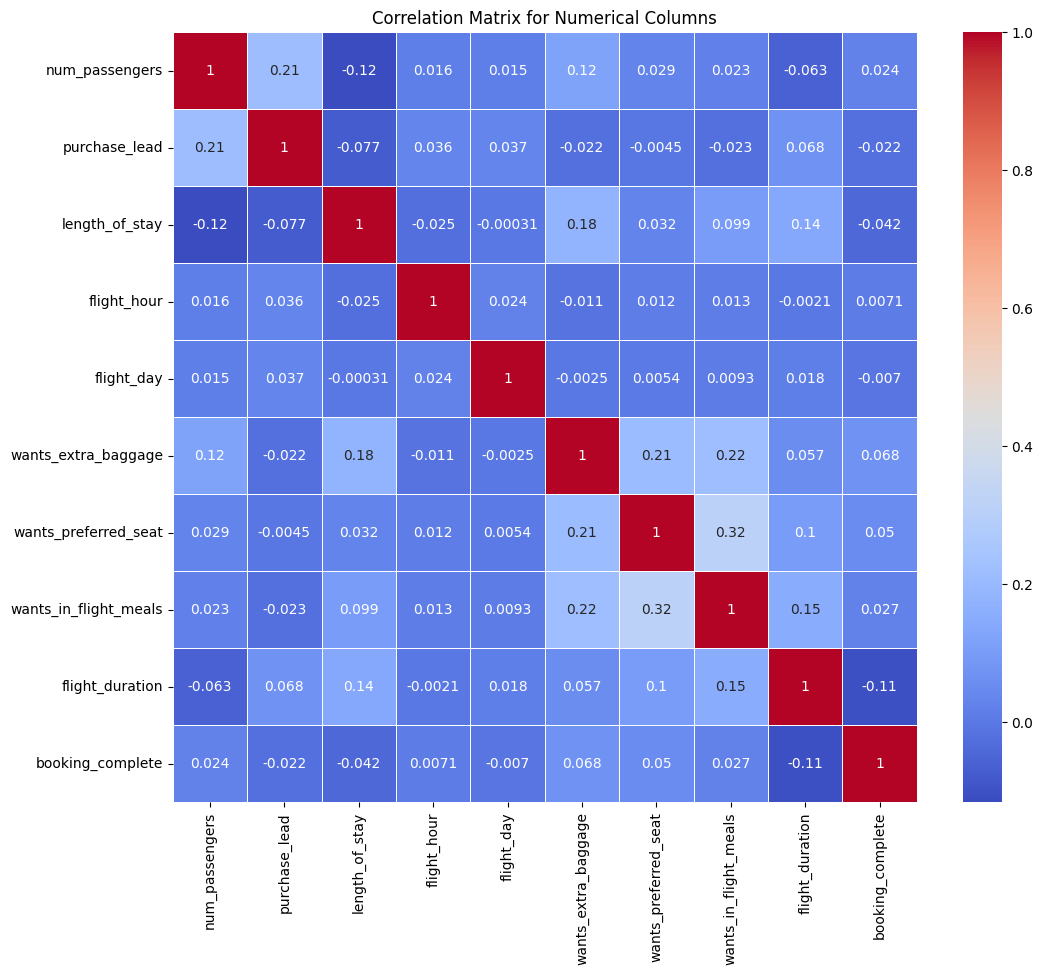

In [11]:
# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


In [12]:
# Check for remaining categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
print("Remaining Categorical Features:", categorical_columns)


Remaining Categorical Features: Index(['sales_channel', 'trip_type'], dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Encode 'sales_channel' and 'trip_type'
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])

# Verify the changes
print(df[['sales_channel', 'trip_type']].head())


   sales_channel  trip_type
0              0          2
1              0          2
2              0          2
3              0          2
4              0          2


In [14]:
# Verify if all columns are numeric
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

if non_numeric_columns.empty:
    print("All columns are now numeric and the dataset is ready for further preprocessing.")
else:
    print("The following columns are still non-numeric:", non_numeric_columns)


The following columns are still non-numeric: Index(['origin_(not set)', 'origin_Afghanistan', 'origin_Algeria',
       'origin_Argentina', 'origin_Australia', 'origin_Austria',
       'origin_Bahrain', 'origin_Bangladesh', 'origin_Belarus',
       'origin_Belgium',
       ...
       'destination_TGG', 'destination_TPE', 'destination_TRZ',
       'destination_TWU', 'destination_URT', 'destination_UTP',
       'destination_VTE', 'destination_VTZ', 'destination_WUH',
       'destination_XIY'],
      dtype='object', length=253)


In [15]:
# Convert one-hot encoded columns to numeric (int type)
df = df.apply(pd.to_numeric, errors='ignore')

# Verify if all columns are numeric now
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

if non_numeric_columns.empty:
    print("All columns are now numeric and the dataset is ready for further preprocessing.")
else:
    print("The following columns are still non-numeric:", non_numeric_columns)


The following columns are still non-numeric: Index(['origin_(not set)', 'origin_Afghanistan', 'origin_Algeria',
       'origin_Argentina', 'origin_Australia', 'origin_Austria',
       'origin_Bahrain', 'origin_Bangladesh', 'origin_Belarus',
       'origin_Belgium',
       ...
       'destination_TGG', 'destination_TPE', 'destination_TRZ',
       'destination_TWU', 'destination_URT', 'destination_UTP',
       'destination_VTE', 'destination_VTZ', 'destination_WUH',
       'destination_XIY'],
      dtype='object', length=253)


<ipython-input-15-eb13b22ea7e4>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [16]:
# Convert one-hot encoded columns to numeric explicitly
one_hot_encoded_columns = df.columns[df.columns.str.startswith(('origin_', 'destination_'))]

# Convert these columns to numeric types
for col in one_hot_encoded_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify if all columns are numeric now
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

if non_numeric_columns.empty:
    print("All columns are now numeric and the dataset is ready for further preprocessing.")
else:
    print("The following columns are still non-numeric:", non_numeric_columns)


The following columns are still non-numeric: Index(['origin_(not set)', 'origin_Afghanistan', 'origin_Algeria',
       'origin_Argentina', 'origin_Australia', 'origin_Austria',
       'origin_Bahrain', 'origin_Bangladesh', 'origin_Belarus',
       'origin_Belgium',
       ...
       'destination_TGG', 'destination_TPE', 'destination_TRZ',
       'destination_TWU', 'destination_URT', 'destination_UTP',
       'destination_VTE', 'destination_VTZ', 'destination_WUH',
       'destination_XIY'],
      dtype='object', length=253)


In [17]:
# Convert one-hot encoded columns to numeric explicitly
one_hot_encoded_columns = df.columns[df.columns.str.startswith(('origin_', 'destination_'))]

# Convert these columns to numeric types explicitly
df[one_hot_encoded_columns] = df[one_hot_encoded_columns].astype(int)

# Verify if all columns are numeric now
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

if non_numeric_columns.empty:
    print("All columns are now numeric and the dataset is ready for further preprocessing.")
else:
    print("The following columns are still non-numeric:", non_numeric_columns)


All columns are now numeric and the dataset is ready for further preprocessing.


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set to balance the target classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the result
print("After SMOTE, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_resampled == 0)))


After SMOTE, counts of label '1': 34002
After SMOTE, counts of label '0': 34002


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the resampled training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance Metrics:
Accuracy: 0.84
Precision: 0.39
Recall: 0.20
F1 Score: 0.27

Confusion Matrix:
[[8056  464]
 [1179  301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8520
           1       0.39      0.20      0.27      1480

    accuracy                           0.84     10000
   macro avg       0.63      0.57      0.59     10000
weighted avg       0.80      0.84      0.81     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the resampled training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the Random Forest model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Model Performance Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

# Display the confusion matrix and classification report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Model Performance Metrics:
Accuracy: 0.84
Precision: 0.42
Recall: 0.22
F1 Score: 0.29

Confusion Matrix:
[[8068  452]
 [1158  322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8520
           1       0.42      0.22      0.29      1480

    accuracy                           0.84     10000
   macro avg       0.65      0.58      0.60     10000
weighted avg       0.81      0.84      0.82     10000



In [22]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred_rf_balanced = rf_balanced.predict(X_test_scaled)

# Evaluate the balanced Random Forest model
accuracy_rf_balanced = accuracy_score(y_test, y_pred_rf_balanced)
precision_rf_balanced = precision_score(y_test, y_pred_rf_balanced)
recall_rf_balanced = recall_score(y_test, y_pred_rf_balanced)
f1_rf_balanced = f1_score(y_test, y_pred_rf_balanced)

print("\nBalanced Random Forest Model Performance Metrics:")
print(f"Accuracy: {accuracy_rf_balanced:.2f}")
print(f"Precision: {precision_rf_balanced:.2f}")
print(f"Recall: {recall_rf_balanced:.2f}")
print(f"F1 Score: {f1_rf_balanced:.2f}")

# Display the confusion matrix and classification report
conf_matrix_rf_balanced = confusion_matrix(y_test, y_pred_rf_balanced)
print("\nConfusion Matrix:")
print(conf_matrix_rf_balanced)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_balanced))



Balanced Random Forest Model Performance Metrics:
Accuracy: 0.84
Precision: 0.42
Recall: 0.22
F1 Score: 0.29

Confusion Matrix:
[[8068  452]
 [1158  322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8520
           1       0.42      0.22      0.29      1480

    accuracy                           0.84     10000
   macro avg       0.65      0.58      0.60     10000
weighted avg       0.81      0.84      0.82     10000



## Some Visualisations

In [25]:
import plotly.express as px


In [26]:
# Distribution of the target variable
fig = px.histogram(df, x='booking_complete', title='Booking Completion Distribution')
fig.show()


In [27]:
fig = px.box(df, x='booking_complete', y='purchase_lead', title='Purchase Lead vs Booking Completion')
fig.show()


In [28]:
fig = px.histogram(df, x='num_passengers', color='booking_complete', barmode='group', title='Number of Passengers vs Booking Completion')
fig.show()


In [29]:
fig = px.histogram(df, x='flight_hour', color='booking_complete', barmode='group', title='Flight Hour vs Booking Completion')
fig.show()
